## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
## The head command will show the Top 5 rows

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
## The info command will be used to display the number of rows are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


c. The number of unique users in the dataset.

In [5]:
## Pandas Nunique will count the number of unique users in the Data
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
len(df.query('converted > 0'))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
## In order to break the code into more readable materials, variables will be created with the lengths of the mismatches

np_not_treat = df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')]
op_not_control = df[(df['landing_page'] == 'old_page') & (df['group'] != 'control')]

## Now the values will be added together

len(np_not_treat) + len(op_not_control)

3893

f. Do any of the rows have missing values?

In [8]:
## Now to use pandas to find the null values and display the ones that are not True

df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
## First step is to copy the  dataframe in order to have the altered df be df2.
df2 = df

In [10]:
## This is to drop the matched rows using the index/position of the matched rows
df2 = df2.drop(np_not_treat.index)
df2 = df2.drop(op_not_control.index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
## This is to see how many unique values in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
## This is to see the user id of the duplcated row/s

df2.loc[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
## This is to query the rows with the non unique id

df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
##This is to drop the second row  by way of the row count
df2.drop(labels = 2893, inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#This is to get the average of the converted 
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
## This is to get the mean of the converted with a query on the group for control
df2[df2.group == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
## This is to get the mean of the converted with a query on the group for treatment
df2[df2.group == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
## This is to lead to  number of the new pages compared to the total rows
len(df2[df2.landing_page == 'new_page'])/ df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is not enough evidence within the given data to state the new page treatment is leading to more coversions. With the new page having a lower conversion by 0.2% and roughly half of the users receiving the new treatment not enough of the convert can lead to speculation among either increas or decrease.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>> Alternative Hypothesis would be that the new page will not have a conversion rate higher than the 12% completion percentage of the Old Page. Effectively this would be achieved.

>> Null Hypothesis would be the New Page has a conversion rate equal to or less that the conversion of the Old Page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
## This is to look at the conversion absent the data of the control

new_prob = df2[df2.landing_page == 'new_page']['converted'].mean()

new_prob

0.11880806551510564

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
## This is to look at the data of the conversions absent the treatment page information

old_prob = df2[df2.landing_page == 'old_page']['converted'].mean()

old_prob

0.1203863045004612

c. What is $n_{new}$?

In [22]:
##Total number of the pages that received the treatment

new_num = len(df2[df2.landing_page == 'new_page'])

new_num

145310

d. What is $n_{old}$?

In [23]:
## Total number of pages that received the controlled page in the same time

old_num = len(df2[df2.landing_page == 'old_page'])

old_num

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [35]:
## Probability under the null needs to be derived before the New Page converted can be obtained
converted_prob = df2.converted.mean()

In [36]:
## Total number of new pages that were converted at random compared to the actual conversion

new_page_converted = np.random.choice([1, 0], size = new_num, p = [converted_prob, 1 - converted_prob])

new_page_converted.mean()

0.12056293441607598

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
## Total number of old pages that were converted at random compared to the actual conversion

old_page_converted = np.random.choice([1, 0], size = old_num, p = [converted_prob, 1 - converted_prob])

old_page_converted.mean()

0.12043448930985585

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [52]:
## Difference between the two averages

(new_page_converted.mean() - old_page_converted.mean())

0.00012844510622012084

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [53]:
p_diffs = []

In [54]:
## This will calculate the diffence similar to the above but the with the specified on the range of 10,000 samples

for _ in range(10000):
    new_page_converts = np.random.choice([1,0], size = new_num, p = [converted_prob, 1 - converted_prob])
    old_page_converts = np.random.choice([1,0], size = old_num, p = [converted_prob, 1 - converted_prob])
    p_diff = (new_page_converts.mean() - old_page_converts.mean())
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

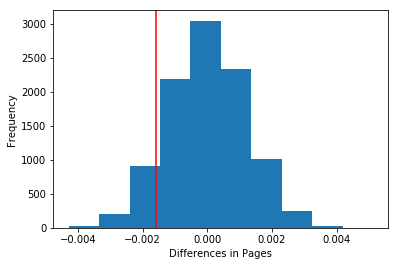

In [55]:
##Use the plt hist to dispaly the booted mean and add the expected
plt.hist(p_diffs);
plt.xlabel('Differences in Pages')
plt.ylabel('Frequency')
plt.axvline(new_prob - old_prob, color = 'r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [58]:
##Calculate  and the difference
act_diff = (new_prob - old_prob)
##Line up the diffs as an array in order to compare
p_diffs = np.asarray(p_diffs)
(p_diffs > act_diff).mean()

0.9036

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> This has created the p-value dicussed in Hypothesis Testing. In standard practice anything higher than a 0.05 would result into differing to the null hypothesis. Based on the data resulting in a p-value of 0.9 we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1')['converted'])
convert_new = len(df2.query('landing_page == "new_page" & converted == 1')['converted'])
n_old = len(df2[df2.landing_page == 'old_page'])
n_new = len(df2[df2.landing_page == 'new_page'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [104]:
sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The Z-score of -1.31 and the P-score was 0.905 consistent with the findings of from earlier in the earlier. With the P-score being above 0.05 the findings fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> This will rely on a logistical regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [69]:
## Create the dummies of the New/Old page

df2['intercept'] = 1
df2[['ab_page', 'control_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,control_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [71]:
## Fit the  Conversion to the New Page and Intercept

lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
## Now to summarize the results with of the converted pages

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sun, 23 Sep 2018   Prob (F-statistic):              0.190
Time:                        13:04:34   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

> The null hypyothesis is that the new treatment will convert at rate equal to or less than the control/old page.

> The alternative hypothesis is that the new treatment will convert at a higher rate than the old page.

> The P-value calculated resulted in the stats model was 0.19. This was lower than the calculations derived in Part 2 which was a one side calculation. This model is based off the two sided calculation. Despite the lower value that was reached. The p-value was still higher than 0.05 that was desired. Based on this we continue to reject the null hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> When looking at analysis it is important to account for all of the values that made impact the result being analyzed. In this case the method of discovery, the pages flipped/clicked through, and the time spent on the pages may impact the results of the comparison.

> Although there may be other factors leading to the conversion, adding too many datapoints specifically factors that are likely to have minimal influence may lead to cluttered results and difficult interpretation, effectively leaving the reader where question was started.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [76]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [82]:
### Create the necessary dummy variables
## get_dummies operates alphabetically so creating the  dummy in mind for the values

df_new[['ca', 'uk', 'us']] = pd.get_dummies(df_new['country'])
lm2 = sm.OLS(df_new['converted'], df_new[['intercept', 'uk', 'us']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Sun, 23 Sep 2018   Prob (F-statistic):              0.201
Time:                        13:56:48   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
uk             0.0053      0.003      1.787      0.074      -0.001       0.011
us             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [83]:
### Fit Your Linear Model And Obtain the Results
## Add the columns

df_new['Page/UK'] = df_new['uk'] * df_new['ab_page']
df_new['Page/US'] = df_new['us'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,control_page,ca,uk,us,Page/UK,Page/US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,1,0


In [86]:
lm3 = sm.OLS(df_new['converted'], df_new[['intercept', 'Page/UK', 'Page/US']])
results_3 = lm3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.151
Date:                Sun, 23 Sep 2018   Prob (F-statistic):              0.316
Time:                        14:26:28   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1200      0.001    144.428      0.000       0.118       0.122
Page/UK        0.0012      0.002      0.627      0.531      -0.003       0.005
Page/US       -0.0015      0.001     -1.154      0.249      -0.004       0.001
==============================================================================
Omnibus:                   125553.045   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414310.566
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         3.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conclusions'></a>
## Conclusions

The results of these comparisons have continued to not provide suffienct evidence to reject the null hypothesis. Even when accounting for Country of origin the results are yet to provide a comparison to recommend the New Treatment.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.